In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_context('talk')

plt.rcParams['font.family'] = "Ubuntu"
vcolor = '#582c83'

In [2]:
df = pd.read_csv("./Files/justVotes.csv")

In [4]:
df.head()

,CDU,SPD,GRÜNE,DIE LINKE,AfD,CSU,FDP,FREIE WÄHLER,PIRATEN,Tierschutzpartei,...,DIE FRAUEN,Graue Panther,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt
0,69,84,77,21,44,0.0,25,3,2,9,...,2,0,0,0,0,0,0,1,1,5
1,24,37,39,5,19,0.0,7,3,4,0,...,0,0,0,0,0,1,0,0,0,2
2,145,145,153,26,61,0.0,34,5,4,11,...,1,7,0,0,0,0,2,4,1,7
3,114,115,133,28,66,0.0,20,10,10,5,...,0,1,1,0,0,0,4,2,1,1
4,93,105,156,45,53,0.0,21,6,8,8,...,0,4,1,0,0,0,0,1,0,4


In [87]:
redux = df.iloc[:,0:5]

In [88]:
redux['Volt'] = df['Volt']

In [89]:
redux.head()

,CDU,SPD,GRÜNE,DIE LINKE,AfD,Volt
0,69,84,77,21,44,5
1,24,37,39,5,19,2
2,145,145,153,26,61,7
3,114,115,133,28,66,1
4,93,105,156,45,53,4


In [90]:
corr = redux.corr()

In [91]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

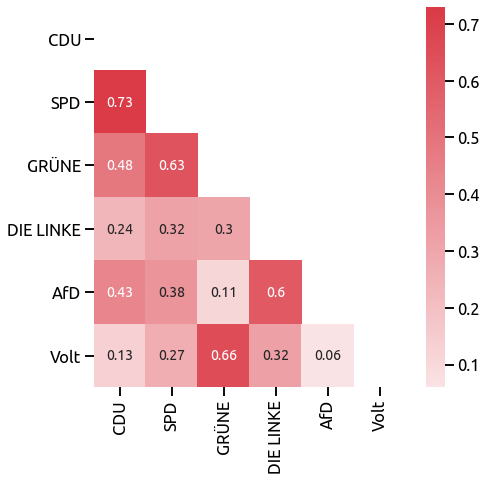

In [92]:
fig, ax = plt.subplots(figsize=(7,7))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, ax=ax, mask=mask, cmap=cmap, center=0.0, annot=True, annot_kws={'size': 14})
plt.show()

---

In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
redux.describe()

,CDU,SPD,GRÜNE,DIE LINKE,AfD,CSU,Volt
count,86887.000000,86887.000000,86887.000000,86887.000000,86887.000000,86876.000000,86887.000000
mean,97.125865,68.098588,88.356958,23.663482,47.238977,27.108373,2.866919
std,94.929918,53.514993,74.947621,26.258234,36.734228,67.740633,4.009490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,32.000000,33.000000,8.000000,24.000000,0.000000,0.000000
50%,81.000000,58.000000,70.000000,16.000000,38.000000,0.000000,2.000000
75%,136.000000,91.000000,123.000000,29.000000,59.000000,0.000000,4.000000
max,2062.000000,1088.000000,1449.000000,460.000000,524.000000,900.000000,94.000000


In [41]:
redux.fillna(value=0.0, inplace=True)

In [42]:
X = redux.iloc[:,:-1]
y = redux['Volt']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [79]:
reglin = LinearRegression()  
reglin.fit(X_train, y_train)

LinearRegression()

In [80]:
#To retrieve the intercept:
print(reglin.intercept_)#For retrieving the slope:
print(reglin.coef_)

0.08298637234192485
[-0.00933169 -0.00938585  0.042835    0.02401968  0.00134965 -0.00291956]


In [81]:
y_pred = reglin.predict(X_test)

In [82]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.7436135005659883
Mean Squared Error: 7.595510086724169
Root Mean Squared Error: 2.755995298748561


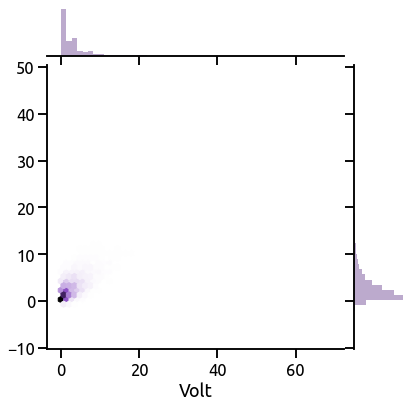

In [84]:
#fig, ax = plt.subplots(figsize=(6,6))

sns.jointplot(y_test, y_pred, kind='hex', color=vcolor)
#plt.plot([0,60], [0,60], c='r', lw=2)
plt.show()

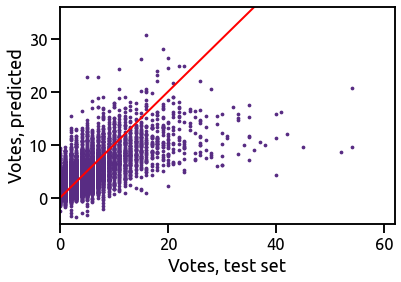

In [86]:
plt.scatter(y_test, y_pred, color=vcolor, s=5)
plt.plot([0,36], [0,36], c='r', lw=2)
plt.xlim(0, 62)
plt.ylim(-5, 36)
plt.xlabel("Votes, test set")
plt.ylabel("Votes, predicted")
plt.show()

---

### Fractional logit

In [99]:
share = pd.read_csv("./Files/justVotes.csv")

In [100]:
share.head()

,CDU,SPD,GRÜNE,DIE LINKE,AfD,CSU,FDP,FREIE WÄHLER,PIRATEN,Tierschutzpartei,...,DIE FRAUEN,Graue Panther,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt
0,69,84,77,21,44,0.0,25,3,2,9,...,2,0,0,0,0,0,0,1,1,5
1,24,37,39,5,19,0.0,7,3,4,0,...,0,0,0,0,0,1,0,0,0,2
2,145,145,153,26,61,0.0,34,5,4,11,...,1,7,0,0,0,0,2,4,1,7
3,114,115,133,28,66,0.0,20,10,10,5,...,0,1,1,0,0,0,4,2,1,1
4,93,105,156,45,53,0.0,21,6,8,8,...,0,4,1,0,0,0,0,1,0,4


In [102]:
share["sum"] = share.sum(axis=1)

In [112]:
snew = share.loc[:,"CDU":"Volt"].div(share["sum"], axis=0)

In [113]:
snew.fillna(value=0.0, inplace=True)

In [114]:
snew.head()

,CDU,SPD,GRÜNE,DIE LINKE,AfD,CSU,FDP,FREIE WÄHLER,PIRATEN,Tierschutzpartei,...,DIE FRAUEN,Graue Panther,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt
0,0.177378,0.215938,0.197943,0.053985,0.113111,0.0,0.064267,0.007712,0.005141,0.023136,...,0.005141,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.002571,0.002571,0.012853
1,0.143713,0.221557,0.233533,0.029940,0.113772,0.0,0.041916,0.017964,0.023952,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.005988,0.000000,0.000000,0.000000,0.011976
2,0.223421,0.223421,0.235747,0.040062,0.093991,0.0,0.052388,0.007704,0.006163,0.016949,...,0.001541,0.010786,0.000000,0.0,0.0,0.000000,0.003082,0.006163,0.001541,0.010786
3,0.199650,0.201401,0.232925,0.049037,0.115587,0.0,0.035026,0.017513,0.017513,0.008757,...,0.000000,0.001751,0.001751,0.0,0.0,0.000000,0.007005,0.003503,0.001751,0.001751
4,0.162021,0.182927,0.271777,0.078397,0.092334,0.0,0.036585,0.010453,0.013937,0.013937,...,0.000000,0.006969,0.001742,0.0,0.0,0.000000,0.000000,0.001742,0.000000,0.006969


In [115]:
import statsmodels.api as sm

In [116]:
y = snew['Volt']
X = snew.iloc[:,0:-1]

In [117]:
mod = sm.Logit(y, X)

In [118]:
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.006706
         Iterations 12


In [120]:
res.summary()

/home/guimas/anaconda3/envs/volt/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Volt   No. Observations:                86887
Model:                          Logit   Df Residuals:                    86847
Method:                           MLE   Df Model:                           39
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:                     inf
Time:                        23:47:55   Log-Likelihood:                -582.68
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
CDU                     -7.3497      0.520    -14.144      0.000      -8.368      -6.331
SPD                     -6.6709      0.736     -9.070      0.000      -8.113      -5.229
GRÜNE                   -2.6329      0.544     -4.838      0.000      -3.699      -1.566
DIE LINKE               -5.2671      1.486     -3.543      0.000      -8.181      -2.354
AfD                     -5.4969      1.011     -5.435      0.000      -7.479      -3.515
CSU                     -6.6055      0.544    -12.145      0.000      -7.672      -5.539
FDP                     -1.7579      1.971     -0.892      0.372      -5.621       2.105
FREIE WÄHLER            -7.5474      2.645     -2.854      0.004     -12.731      -2.364
PIRATEN                  0.0843      7.554      0.011      0.991     -14.721      14.890
Tierschutzpartei        -5.7115      5.323     -1.073      0.283     -16.144       4.721
NPD                     -8.4652     10.156     -0.834      0.405     -28.370      11.440
FAMILIE                 -8.8437      7.455     -1.186      0.236     -23.456       5.769
ÖDP                     -1.9753      2.524     -0.783      0.434      -6.923       2.972
Die PARTEI              -0.0483      2.982     -0.016      0.987      -5.894       5.797
Volksabstimmung        -10.6797     19.147     -0.558      0.577     -48.207      26.848
BP                      -6.8442     12.431     -0.551      0.582     -31.209      17.521
DKP                    -10.5343     28.952     -0.364      0.716     -67.278      46.210
MLPD                    -4.5746     28.905     -0.158      0.874     -61.227      52.078
SGP                     -1.2961     53.588     -0.024      0.981    -106.327     103.735
TIERSCHUTZ hier!        -7.7531     13.701     -0.566      0.571     -34.606      19.100
Tierschutzallianz      -10.2298     17.067     -0.599      0.549     -43.681      23.222
Bündnis C               -7.7784     12.676     -0.614      0.539     -32.623      17.066
BIG                     -2.2674      6.122     -0.370      0.711     -14.266       9.731
BGE                     -8.8335     20.646     -0.428      0.669     -49.300      31.633
DIE DIREKTE!            -5.2963     27.737     -0.191      0.849     -59.661      49.068
DiEM25                   0.6737      8.531      0.079      0.937     -16.046      17.393
III. Weg                 0.0902     31.668      0.003      0.998     -61.979      62.159
Die Grauen              -5.8591     16.024     -0.366      0.715     -37.266      25.548
DIE RECHTE              -6.5977     25.192     -0.262      0.793     -55.974      42.778
DIE VIOLETTEN           -6.0671     25.134     -0.241      0.809     -55.329      43.194
LIEBE                  -10.1225     24.645     -0.411      0.681     -58.426      38.181
DIE FRAUEN              -3.4256     19.290     -0.178      0.859     -41.234      34.383
Graue Panther           -3.7640     16.236     -0.232      0.817     -35.587      28.059
LKR                      1.9857     2

In [127]:
snew['pred'] = res.predict(X)

In [128]:
snew[['Volt','pred']]

,Volt,pred
0,0.012853,0.005818
1,0.011976,0.009678
2,0.010786,0.006567
3,0.001751,0.007401
4,0.006969,0.009536
...,...,...
86882,0.000000,0.002261
86883,0.003356,0.003313
86884,0.000000,0.002330
86885,0.000000,0.003326


In [132]:
np.abs(snew['Volt']-snew['pred']).sum()/len(snew)

0.0038956749041473243